# Exploratory Data Engineering
This notebook contains initial exploratory data pre-processing efforts that will later be copied into a proper script named preprocessing.py.
THIS NOTEBOOK IS NOT NEEDED ANYMORE DUE TO THE CHANGE TO GDELT DATA.

In [1]:
import pandas as pd
from preprocessing_helpers import classic_nlp_preprocessing, replace_html_number_codes

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\janhe\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\janhe\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\janhe\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
# Read in for the cnbc news dataset
df = pd.read_csv("nlp_data/cnbc_news_dataset.csv", header=0, low_memory=False)
df.head()

,title,url,published_at,author,publisher,short_description,keywords,header_image,raw_description,description,scraped_at
0,Santoli’s Wednesday market notes: Could Septem...,https://www.cnbc.com/2021/09/29/santolis-wedne...,2021-09-29T17:09:39+0000,Michael Santoli,CNBC,"This is the daily notebook of Mike Santoli, CN...","cnbc, Premium, Articles, Investment strategy, ...",https://image.cnbcfm.com/api/v1/image/10694960...,"<div class=""group""><p><em>This is the daily no...","This is the daily notebook of Mike Santoli, CN...",2021-10-30 14:11:23.709372
1,My take on the early Brexit winners and losers,https://www.cnbc.com/2016/06/24/ian-bremmers-t...,2016-06-24T13:50:48-0400,NaN,CNBC,This commentary originally ran on Facebook. Bo...,"Articles, Politics, Europe News, European Cent...",https://fm.cnbc.com/applications/cnbc.com/reso...,NaN,NaN,2021-10-30 14:11:23.820139
2,Europe&#039;s recovery depends on Renzi&#039;s...,https://www.cnbc.com/2014/03/25/europes-recove...,2014-03-25T13:29:45-0400,NaN,CNBC,"In spring, ambitious reforms began in Italy. U...","Articles, Business News, Economy, Europe Econo...",https://fm.cnbc.com/applications/cnbc.com/reso...,NaN,NaN,2021-10-30 14:11:23.854710
3,US Moves Closer to Becoming A Major Shareholde...,https://www.cnbc.com/2009/04/22/us-moves-close...,2009-04-22T19:49:03+0000,Michelle Caruso-Cabrera,CNBC,The US government is increasingly likely to co...,"cnbc, Articles, General Motors Co, Business Ne...",https://image.cnbcfm.com/api/v1/image/24947979...,"<div class=""group""><p>The US government is inc...",The US government is increasingly likely to co...,2021-10-30 14:11:24.261143
4,Trump: 'Mission accomplished' on 'perfectly ex...,https://www.cnbc.com/2018/04/14/trump-mission-...,2018-04-14T14:59:04+0000,Javier E. David,CNBC,NaN,"cnbc, Articles, George W. Bush, Vladimir Putin...",https://image.cnbcfm.com/api/v1/image/10513177...,"<div class=""group""></div>,<div class=""group""><...",President Donald Trump hailed the U.S.-led int...,2021-10-30 14:11:24.489490


In [3]:
# Get rid of attributes that are not of interest for now
drop_list = ['url', 'author', 'publisher', 'header_image', 'raw_description', 'scraped_at']
df.drop(drop_list, axis=1, inplace=True)

In [4]:
# Get the number of distinct keywords
all_keywords = []
df['keywords'].apply(lambda x: all_keywords.extend(x.split(',')))
print(f"There are {len(set(all_keywords))} distinct keywords")

There are 1426 distinct keywords


In [5]:
short_desc_len = df['short_description'].apply(lambda x: len(x.split(" ")) if type(x) == str else None)
short_desc_len = short_desc_len[~short_desc_len.isna()]

print(f"The mean length of a short description is {short_desc_len.mean()}")
print(f"The min length of a short description is {short_desc_len.min()}")
print(f"The max length of a short description is {short_desc_len.max()}")

long_desc_len = df['description'].apply(lambda x: len(x.split(" ")) if type(x) == str else None)
long_desc_len = long_desc_len[~long_desc_len.isna()]

print(f"The mean length of a long description is {long_desc_len.mean()}")
print(f"The min length of a long description is {long_desc_len.min()}")
print(f"The max length of a long description is {long_desc_len.max()}")

The mean length of a short description is 262.735632183908
The min length of a short description is 3.0
The max length of a short description is 5931.0
The mean length of a long description is 527.7284991568297
The min length of a long description is 11.0
The max length of a long description is 5931.0


In [6]:
df.columns

Index(['title', 'published_at', 'short_description', 'keywords',
       'description'],
      dtype='object')

In [7]:
# Replace HTML number codes
text_cols = ['title', 'short_description', 'description']
for col in text_cols:
    df[col] = df[col].apply(replace_html_number_codes)

In [8]:
df = classic_nlp_preprocessing(df, text_cols)

In [9]:
df.head()

,title,published_at,short_description,keywords,description,title_lowered,title_tokenized,title_removed_stopwords,title_lemmatized,short_description_lowered,short_description_tokenized,short_description_removed_stopwords,short_description_lemmatized,description_lowered,description_tokenized,description_removed_stopwords,description_lemmatized
0,Santoli’s Wednesday market notes: Could Septem...,2021-09-29T17:09:39+0000,"This is the daily notebook of Mike Santoli, CN...","cnbc, Premium, Articles, Investment strategy, ...","This is the daily notebook of Mike Santoli, CN...",santoli’s wednesday market notes could septemb...,"[santoli, ’, s, wednesday, market, notes, coul...","[santoli, wednesday, market, notes, could, sep...","[santoli, wednesday, market, note, could, sept...",this is the daily notebook of mike santoli cnb...,"[this, is, the, daily, notebook, of, mike, san...","[daily, notebook, mike, santoli, cnbcs, senior...","[daily, notebook, mike, santoli, cnbcs, senior...",this is the daily notebook of mike santoli cnb...,"[this, is, the, daily, notebook, of, mike, san...","[daily, notebook, mike, santoli, cnbcs, senior...","[daily, notebook, mike, santoli, cnbcs, senior..."
1,My take on the early Brexit winners and losers,2016-06-24T13:50:48-0400,This commentary originally ran on Facebook. Bo...,"Articles, Politics, Europe News, European Cent...",NaN,my take on the early brexit winners and losers,"[my, take, on, the, early, brexit, winners, an...","[take, early, brexit, winners, losers]","[take, early, brexit, winner, loser]",this commentary originally ran on facebook bor...,"[this, commentary, originally, ran, on, facebo...","[commentary, originally, ran, facebook, boris,...","[commentary, originally, ran, facebook, boris,...",NaN,None,None,None
2,Europe's recovery depends on Renzi's Italy,2014-03-25T13:29:45-0400,"In spring, ambitious reforms began in Italy. U...","Articles, Business News, Economy, Europe Econo...",NaN,europes recovery depends on renzis italy,"[europes, recovery, depends, on, renzis, italy]","[europes, recovery, depends, renzis, italy]","[europe, recovery, depends, renzis, italy]",in spring ambitious reforms began in italy und...,"[in, spring, ambitious, reforms, began, in, it...","[spring, ambitious, reforms, began, italy, mat...","[spring, ambitious, reform, began, italy, matt...",NaN,None,None,None
3,US Moves Closer to Becoming A Major Shareholde...,2009-04-22T19:49:03+0000,The US government is increasingly likely to co...,"cnbc, Articles, General Motors Co, Business Ne...",The US government is increasingly likely to co...,us moves closer to becoming a major shareholde...,"[us, moves, closer, to, becoming, a, major, sh...","[us, moves, closer, becoming, major, sharehold...","[us, move, closer, becoming, major, shareholde...",the us government is increasingly likely to co...,"[the, us, government, is, increasingly, likely...","[us, government, increasingly, likely, convert...","[us, government, increasingly, likely, convert...",the us government is increasingly likely to co...,"[the, us, government, is, increasingly, likely...","[us, government, increasingly, likely, convert...","[us, government, increasingly, likely, convert..."
4,Trump: 'Mission accomplished' on 'perfectly ex...,2018-04-14T14:59:04+0000,NaN,"cnbc, Articles, George W. Bush, Vladimir Putin...",President Donald Trump hailed the U.S.-led int...,trump mission accomplished on perfectly execut...,"[trump, mission, accomplished, on, perfectly, ...","[trump, mission, accomplished, perfectly, exec...","[trump, mission, accomplished, perfectly, exec...",NaN,None,None,None,president donald trump hailed the usled interv...,"[president, donald, trump, hailed, the, usled,...","[president, donald, trump, hailed, usled, inte...","[president, donald, trump, hailed, usled, inte..."


In [10]:
df.to_csv('./nlp_data/cnbc_news_dataset_processed.csv')

## Custom analysis of the newsSpace dataset
This additional exploratory analysis is to evaluate the quality of the newsSpace dataset.

NOTE: The dataset needed for this has not been added to the repository, because it is too large.

In [11]:
df = pd.read_csv("nlp_data/newsSpace_processed.csv", header=0, low_memory=False)
df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'nlp_data/newsSpace_processed.csv'

In [ ]:
# Total number of entries
df.shape[0]

142557

In [ ]:
# Number of posts where the title is NaN
df[df['title'].isna()].shape[0]

0

In [ ]:
# Number of posts where the description is NaN
df[df['description'].isna()].shape[0]

2

In [ ]:
# Number of posts where the pubdate is 0000-00-00 00:00:00
df[df['pubdate'] != '0000-00-00 00:00:00'].shape[0]

142557

In [ ]:
# Number of posts where the title is 0000-00-00 00:00:00
df[df['title'] == '0000-00-00 00:00:00'].shape[0]

0

In [ ]:
# Number of posts where the pubdate is legitimate
pattern = r'\d{4}-\d{2}-\d{2} \d{2}:\d{2}:\d{2}'
filtered_df = df[df['pubdate'] != '0000-00-00 00:00:00']

# Applying the regular expression pattern on 'pubdate' column and counting the matches
df[pd.notna(df['pubdate']) & df['pubdate'].str.match(pattern)].shape

(142557, 14)

### Final checks
This is to ensure that the filtering didn't affect any portion of the datasets timeline disproportionally.

NOTE: The dataset needed for this has not been added to the repository, because it is too large.

In [ ]:
# Additional import
import matplotlib.pyplot as plt

In [ ]:
df_for_counting = pd.DataFrame(index=pd.to_datetime(df['pubdate'], format='%Y-%m-%d %H:%M:%S'))

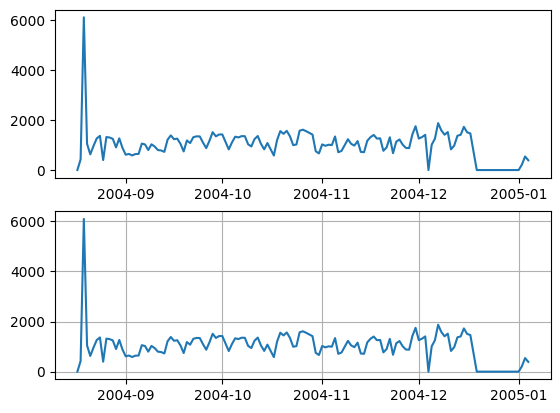

In [ ]:
daily_counts = df_for_counting.resample('D').size()

# Same with the original DataFrame for comparison
df_raw = pd.read_csv("nlp_data/newsSpace.csv", header=0, low_memory=False)
df_raw['pubdate'] = df_raw['pubdate'].replace("0000-00-00 00:00:00", "")
df_raw.index = pd.to_datetime(df_raw['pubdate'])
raw_daily_counts = df_raw.resample('D').size()


fig, (ax1, ax2) = plt.subplots(2, 1)
ax1.plot(daily_counts)
ax2.plot(raw_daily_counts)

# Customize the plot
plt.grid(True)

# Show the plot
plt.show()